## SC3251 - Module 5  
**Name:** Hussary, Elias   
**Assignment:** SC3251 - Module 4 & 5   
**Date:** 2018-06-11

---

### Assignment Instructions
Option 2.

Section 6.5 of the OpenIntro Statistics textbook describes how simulation can assist when one of the assumptions / requirements of the Chi-square distribution are not met. The step-by-step explanation is presented in the chapter.

The assignment is to follow the steps using Python.
___

In [14]:
%config IPCompleter.greedy=True # for better intellisense
import random as rd
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt, rcParams
rcParams.update({'font.size': 16, 'figure.figsize': (10,6)}) # global formatting

### Hypothesis Simulation

People providing an organ for donation sometimes seek the help of a special “medical consultant”. These consultants assist the patient in all aspects of the surgery, with the goal of reducing the possibility of complications during the medical procedure and recovery. Patients might choose a consultant based in part on the historical complication rate of the consultant’s clients. **One consultant tried to attract patients by noting the average complication rate for liver donor surgeries in the US is about 10%, but her clients have only had 3 complications in the 62 liver donor surgeries she has facilitated.**
She claims this is strong evidence that her work meaningfully contributes to reducing complications (and therefore she should be hired!).  


In [28]:
# do the simulation
num_trials = 62
complication_rate = 0.1
max_iter = 50000 # increasing iterations, txtbook used 10k
trial_data = []

while len(trial_data) < max_iter:
    failure_pct = sum(np.random.rand(num_trials) < complication_rate) / num_trials
    trial_data.append(failure_pct)

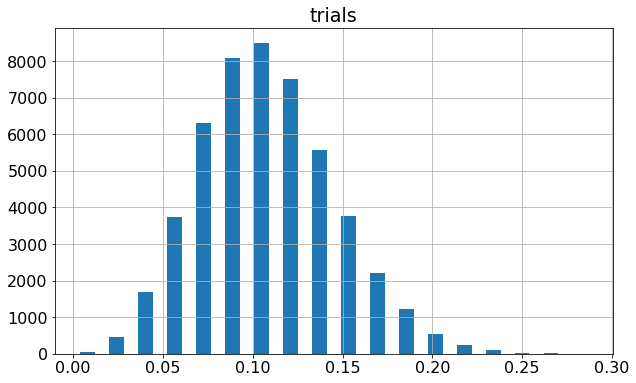

In [32]:
trial_df = pd.DataFrame({'trials': trial_data})
hist_ax = trial_df.hist(bins=18, rwidth=0.5)
print(hist_ax[0])

0.04838709677419355